In [2]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [3]:
#Variables that contains the user credentials to access Twitter API 
access_token = "secret"
access_token_secret = "secret"
consumer_key = "secret"
consumer_secret = "secret"

In [8]:
f = open('twitter_data_USA.txt', 'a')
class StdOutListener(StreamListener):

    def on_data(self, data):
        #print(data)
        f.write(data)
        return True

    def on_error(self, status):
        f.write(data)
        print(status)

In [9]:
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)

#This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
#stream.filter(track=['python', 'javascript', 'ruby'])
stream.filter(track=['trump', 'north korea'])
#stream.filter(track=['python', 'javascript'])


ProtocolError: ('Connection broken: IncompleteRead(3724 bytes read)', IncompleteRead(3724 bytes read))

In [186]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
tweets_data_path = 'twitter_data_USA.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [7]:
len(tweets_data)

0

In [189]:
#tweets = pd.DataFrame(index=['text','lang','country'])
tweets = pd.DataFrame()

In [190]:
tweets_data[1]['text']

'RT @RadioFreeTom: First rule of effective use of Good Cop / Bad Cop is that you don’t admit you’re just playing Good Cop / Bad Cop https://…'

In [191]:
tweets_data[1]['lang']

'en'

In [192]:
tweets_data[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Oct 01 22:58:37 +0000 2017',
 'entities': {'hashtags': [{'indices': [44, 59], 'text': 'PresidentTrump'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 4152518164,
    'id_str': '4152518164',
    'indices': [3, 13],
    'name': '🇺🇸♦️VANIDA ♦️🇺🇸',
    'screen_name': 'vadpradub'}]},
 'favorite_count': 0,
 'favorited': False,
 'filter_level': 'low',
 'geo': None,
 'id': 914625629299134465,
 'id_str': '914625629299134465',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'quote_count': 0,
 'reply_count': 0,
 'retweet_count': 0,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Sun Oct 01 22:10:38 +0000 2017',
  'entities': {'hashtags': [{'indices': [29, 44], 'text': 'PresidentTrump'}],
 

In [193]:
tweets['text'] = [tweet['text'] if 'text' in tweet else None for tweet in tweets_data]
tweets['lang'] = [tweet['lang'] if 'lang' in tweet else None for tweet in tweets_data]
tweets['country'] = [tweet['place']['country'] if ('place' in tweet)and('country' in tweet) else None for tweet in tweets_data]
tweets['retweeted_text'] = [tweet['retweeted_status']['text'] if ('retweeted_status' in tweet)and('text' in tweet['retweeted_status']) else None for tweet in tweets_data]
tweets['quoted_text'] = [tweet['quoted_status']['text'] if ('quoted_status' in tweet)and('text' in tweet['quoted_status']) else None for tweet in tweets_data]

In [194]:
tweets.head()

,text,lang,country,retweeted_text,quoted_text
0,RT @vadpradub: Puerto Rico Governor praised #P...,en,None,Puerto Rico Governor praised #PresidentTrump i...,None
1,RT @RadioFreeTom: First rule of effective use ...,en,None,First rule of effective use of Good Cop / Bad ...,Oh ffs\n\n1 Trump good cop bad cop not slam at...
2,JFC he's stupid https://t.co/Xr5GArr6x2,en,None,None,President Trump dedicates Presidents Cup golf ...
3,BBC News - Trump to Tillerson: N Korea negotia...,en,None,None,None
4,RT @JoyAnnReid: Seems the entire Trump team vi...,en,None,Seems the entire Trump team views their time i...,The VA secretary and his wife spent about half...


In [195]:
tweets.text.loc[1]

'RT @RadioFreeTom: First rule of effective use of Good Cop / Bad Cop is that you don’t admit you’re just playing Good Cop / Bad Cop https://…'

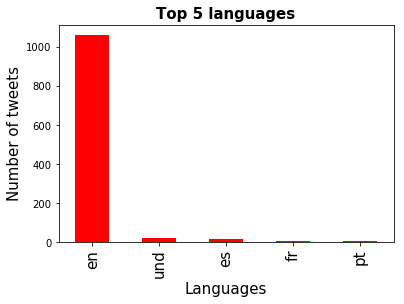

In [196]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [197]:
import re
def word_in_text(word, text):
    if text is None:
        return False
    if word.lower() in text.lower():
        return True
    return False

In [198]:
tweets['trump'] = tweets['text'].apply(lambda tweet: word_in_text('trump', tweet))
tweets['trump'] = (tweets['trump'] | tweets['retweeted_text'].apply(lambda tweet: word_in_text('trump', tweet)))
tweets['trump'] = tweets['trump'] | tweets['quoted_text'].apply(lambda tweet: word_in_text('trump', tweet))
tweets['north korea'] = tweets['text'].apply(lambda tweet: word_in_text('north korea', tweet))
tweets['north korea'] = tweets['north korea'] | tweets['retweeted_text'].apply(lambda tweet: word_in_text('north korea', tweet))
tweets['north korea'] = tweets['north korea'] | tweets['quoted_text'].apply(lambda tweet: word_in_text('north korea', tweet))

In [199]:
print(tweets['trump'].value_counts()[True])
print(tweets['north korea'].value_counts()[True])

1013
32


In [200]:
tweets.head()

,text,lang,country,retweeted_text,quoted_text,trump,north korea
0,RT @vadpradub: Puerto Rico Governor praised #P...,en,None,Puerto Rico Governor praised #PresidentTrump i...,None,True,False
1,RT @RadioFreeTom: First rule of effective use ...,en,None,First rule of effective use of Good Cop / Bad ...,Oh ffs\n\n1 Trump good cop bad cop not slam at...,True,False
2,JFC he's stupid https://t.co/Xr5GArr6x2,en,None,None,President Trump dedicates Presidents Cup golf ...,True,False
3,BBC News - Trump to Tillerson: N Korea negotia...,en,None,None,None,True,False
4,RT @JoyAnnReid: Seems the entire Trump team vi...,en,None,Seems the entire Trump team views their time i...,The VA secretary and his wife spent about half...,True,False
